<a href="https://colab.research.google.com/github/MuroriM/GEM-table-to-text-through-AMR/blob/main/GEM_AMR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Next Step

## Todo (Ziming):
Cleanup!! <br>
Knowledge Graph-Augmented Abstractive Summarization with Semantic-Driven Cloze Reward: [Paper](https://arxiv.org/pdf/2005.01159.pdf) [Code](https://github.com/luyang-huang96/GraphAugmentedSum/blob/master/preprocess/OpenIE_process.py) <br>
An AMR Aligner Tuned by Transition-based Parser
: [Link](https://arxiv.org/pdf/1810.03541.pdf) [Code](https://github.com/Oneplus/tamr)

# Character-based AMR translation

In [ ]:
!git clone https://github.com/RikVN/AMR.git
# https://github.com/RikVN/AMR

Cloning into 'AMR'...
remote: Enumerating objects: 127, done.
remote: Total 127 (delta 0), reused 0 (delta 0), pack-reused 127
Receiving objects: 100% (127/127), 209.88 KiB | 16.14 MiB/s, done.
Resolving deltas: 100% (54/54), done.


In [ ]:
%cd /content/AMR

/content/AMR


In [ ]:
!git clone https://github.com/snowblink14/smatch

fatal: destination path 'smatch' already exists and is not an empty directory.


In [ ]:
!pip install -r requirements.txt

In [ ]:
!python restoreAMR/restore_amr.py -f sample_input/sample.txt.char.tf -o sample_input/restored

Traceback (most recent call last):
  File "restoreAMR/restore_amr.py", line 758, in <module>
    for idx, line in enumerate(open(args.input_file, 'r')):
FileNotFoundError: [Errno 2] No such file or directory: 'sample_input/sample.txt.char.tf'


In [ ]:
import amrlib
gtos = amrlib.load_gtos_model('/content/model_generate_t5wtense-v0_1_0')
input =  ['Patricia award BAFTA', 'BAFTA year 1992', 'Patricia is an actor']
expected = ['Patricia was awarded BAFTA in 1992 for her role as an actor']
input_strings = []
output_strings = []
graphs = stog.parse_sents(input)
for graph in graphs:
  string = "\n".join(graph.split("\n")[1:])
  print(string)
  input_strings.append(string)

graphs = stog.parse_sents(expected)
for graph in graphs:
  string = "\n".join(graph.split("\n")[1:])
  print(string)
  output_strings.append(string)

ModuleNotFoundError: ignored

In [ ]:
f = open('/content/test.txt.tf', 'r')
file_contents = f.read()
print(file_contents)
f.close()

In [ ]:
%cd /content/AMR

In [ ]:
# Put the above AMRs in the /content/test.txt
# Remember to add a new line between each AMR
!python var_free_amrs.py -f /content/test.txt

In [ ]:
!python char_level_AMR.py -f /content/test.txt.tf

In [ ]:
%cd /content/AMR

In [ ]:
# This step is important!
# Though a temporary fix
!cp amr_utils.py restoreAMR
!cp best_amr_permutation.py restoreAMR
!cp var_free_amrs.py restoreAMR


In [ ]:
!python postprocess_AMRs.py -f /content/test.txt.char.tf -n

In [ ]:
!python reformat_single_amrs.py -f /content/test.txt.char.tf.restore.final -e .form

# AMR-gs

In [ ]:
%cd /content

In [ ]:
# https://github.com/jcyk/AMR-gs
!git clone https://github.com/jcyk/AMR-gs.git

In [ ]:
%cd AMR-gs/

In [ ]:
!pip install -r requirements.txt

In [ ]:
!pip install pytorch_pretrained_bert

In [ ]:
!pip install pycorenlp

In [ ]:
!sh run_standford_corenlp_server.sh

In [ ]:
!sh preprocess_raw.sh /content/AMR/sample_input/sample.txt.sent

# Penman

In [ ]:
!pip install penman
# https://penman.readthedocs.io/en/latest/library.html

In [ ]:
import penman
from penman import constant
from penman.graph import Graph

In [ ]:
# Convert triples to penman notation
g2 = Graph([('a', ':instance', 'award-01'),('p', ':instance', 'Patricia'),('b', ':instance', 'BAFTA'), ('p', ':ARG1', 'a'), ('b', ':ARG0', 'a')])

In [ ]:
print(penman.encode(g2))

# amrlib

In [ ]:
%cd /content

In [ ]:
!pip3 install amrlib

In [ ]:
!git clone https://github.com/bjascob/amrlib.git

In [ ]:
!wget https://github.com/bjascob/amrlib-models/releases/download/model_parse_t5-v0_1_0/model_parse_t5-v0_1_0.tar.gz

In [ ]:
!tar xzf model_parse_t5-v0_1_0.tar.gz

In [ ]:
!wget https://github.com/bjascob/amrlib-models/releases/download/model_generate_t5wtense-v0_1_0/model_generate_t5wtense-v0_1_0.tar.gz

In [ ]:
!tar xzf model_generate_t5wtense-v0_1_0.tar.gz

In [ ]:
!pip install sentencepiece
!pip install word2number

In [ ]:
import amrlib
stog = amrlib.load_stog_model('/content/model_parse_t5-v0_1_0')
graphs = stog.parse_sents(['I love cooking'])
for graph in graphs:
    print(graph)

# Named-entity extractor / wikidata 

In [ ]:
# Link to my Wikidata-based entity extractor notebook (for the fb project)
# https://colab.research.google.com/drive/1bp4ME-HBdJuPQWzy2crQth-yEM67UO1y?usp=sharing

In [ ]:
# This is to address the issue that amrlib may not know what "BAFTA" is

In [ ]:
import requests
!pip install wptools
import wptools

In [ ]:
entity = "BAFTA"

API_ENDPOINT = "https://www.wikidata.org/w/api.php"
params = {
    'action': 'wbsearchentities',
    'format': 'json',
    'language': 'en',
    'search': entity
}
r = requests.get(API_ENDPOINT, params = params)
try: 
  print(r.json()['search'][0]['label'])
except:
  pass  

In [ ]:
# Wikidata has "instance of" and "subclass of" property link
# May not work well here

# Triple-to-AMR

In [ ]:
# Two lists of sample triples
triples = [['Patricia', 'award', 'BAFTA'], ['BAFTA', 'year', '1992'], ['Patricia', 'role', 'actor']]
triples = [["Mars Hill College","JOINED","1973"],["Mars Hill College","LOCATION","Mars Hill, North Carolina"]]

In [ ]:
# Simply joining them into a sentence
sents = [' '.join(triple) for triple in triples]
sents

In [ ]:
graphs = stog.parse_sents(sents)

In [ ]:
strings = []
for graph in graphs:
  # Remove the first line (which is the comment that contains the original sentence)
  string = "\n".join(graph.split("\n")[1:])
  print(string)
  strings.append(string)

In [ ]:
# Reproduce the sentence from these amr graphs
import amrlib
gtos = amrlib.load_gtos_model('/content/model_generate_t5wtense-v0_1_0')
sents, _ = gtos.generate(strings)
for sent in sents:
  print(sent)

In [ ]:
triples_list = []
for string in strings:
  g = penman.decode(string)
  triples_list.append(g.triples)

In [ ]:
t = g.triples
t

# Triple merging

In [ ]:
triples_list

In [ ]:
# Map entities (e.g. BAFTA) to symbol (e.g. 'n1')
entity_to_symbol = {}

# A set recording used symbols (e.g. 'n1')
used_symbol = set()

# Final set of triples
triples_final = set()

for triples in triples_list:
  old_to_new = {}
  for sub, pred, obj in triples:

    # If the symbol is already taken by the same entity in previous triples
    if ":op" in pred and obj in entity_to_symbol:
      old_to_new[sub] = entity_to_symbol[obj]
      used_symbol.add(sub)

    # if the symbol is not taken
    elif ":op" in pred and obj not in entity_to_symbol:
      entity_to_symbol[obj] = sub
      used_symbol.add(sub)

    # If the symbol is taken by a different entitty
    elif ":op" in pred and sub in used_symbol:
      # Pick a new 'n' symbol by incrementing "n" symbol
      if sub == "n":
        old_to_new[sub] = "n2"
      else:
        old_to_new[sub] = "n" + str((int(sub[1]) + 1))

  print(old_to_new)

  # Modify the triples
  for sub, pred, obj in triples:
    if sub in old_to_new:
      sub = old_to_new[sub]
    if obj in old_to_new:
      obj = old_to_new[obj]
    triples_final.add((sub, pred, obj))  

In [ ]:
entity_to_symbol

In [ ]:
triples_final

# Sentence Generation

In [ ]:
g = Graph(list(triples_final))

In [ ]:
graph = penman.encode(g)
print(graph)

In [ ]:
import amrlib
gtos = amrlib.load_gtos_model('/content/model_generate_t5wtense-v0_1_0')
sents, _ = gtos.generate([graph])

In [ ]:
"""
 Triples = [
  ['Patricia', 'award', 'BAFTA'], 
  ['BAFTA', 'year', '1992'], 
  ['Patricia', 'role', 'actor']
]
"""
for sent in sents:
    print(sent)

In [ ]:
# Possible-fix (Ziming):
# named entity recognition for terms such as BAFTA
# Adjust tense of the column header: Change "award" to "awarded"
# To-do: 
# Merge rows
# The order is wrong

# amr-reader

In [ ]:
%cd /content

In [ ]:
!git clone https://github.com/panx27/amr-reader.git

In [ ]:
# Put the penman encoding to amr-reader/amrreader/test/test_amr_doc/test

In [ ]:
!sudo pip install pygraphviz

In [ ]:
!python amr-reader/amrreader/main.py amr-reader/amrreader/test/test_amr_doc/ output/ -v=s

In [ ]:
# Look for output/graphs

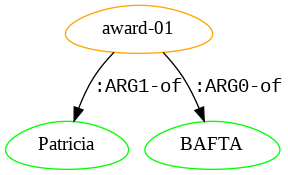

# Smatch

In [ ]:
!git clone https://github.com/snowblink14/smatch.git

In [ ]:
%cd smatch

In [ ]:
!python smatch.py -f test_input1.txt test_input2.txt

In [ ]:
!python smatch.py --help

In [ ]:
!python smatch.py -f test_input1.txt test_input2.txt --ms

In [ ]:
# print(cur_amr1, cur_amr2) on line 739
!python smatch.py -f test_input1.txt test_input2.txt

In [ ]:
# Print out the AMR mapping
!python smatch.py -f test_input1.txt test_input2.txt

In [ ]:
# Not really working rn:
# /data/lily/zm92/GEM/smatch/

In [ ]:
Another possible direction: https://github.com/tmetsch/graph_stitcher

# TAMR (to-be-fixed)

In [ ]:
%cd /content

In [ ]:
!git clone https://github.com/Oneplus/tamr.git

In [ ]:
!git clone https://github.com/jflanigan/jamr.git

In [ ]:
%cd tamr

In [ ]:
!chmod +x ./pipeline.sh

In [ ]:
# # Please specify the JAMR home here.
# JAMR_HOME=/content/jamr
# Please specify the TAMR home here.
# TAMR_HOME=/content/tamr
# Change Python to python2
# ^ still has the penman issue that cannot be solved

!./pipeline.sh

# AMR-Eager (To-be-fixed)

In [ ]:
!git clone https://github.com/mdtux89/amr-eager.git

In [ ]:
%cd amr-eager/

In [ ]:
# Doesn't work
!./download.sh

# Graph Augmented Summ (to-be-fixed)

In [ ]:
!git clone https://github.com/luyang-huang96/GraphAugmentedSum.git

In [ ]:
!python GraphAugmentedSum/preprocess/OpenIE_process.py